In [1]:
import numpy as np
import pandas as pd
import sys
import statsmodels
import sklearn
import scipy
print('python version:',sys.version)
print("pandas version:",pd.__version__)
print("numpy version:",np.__version__)
print('statsmodels:',statsmodels.__version__)
print('sklearn:',sklearn.__version__)
print('scipy:',scipy.__version__)
# python version: 3.8.3 | packaged by conda-forge | (default, Jun  1 2020, 16:59:10) [MSC v.1916 64 bit (AMD64)]
# pandas version: 1.0.5
# numpy version: 1.18.5
# statsmodels: 0.11.1
# sklearn: 0.23.1
# scipy: 1.3.2

python version: 3.8.3 | packaged by conda-forge | (default, Jun  1 2020, 16:59:10) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.0.5
numpy version: 1.18.5
statsmodels: 0.11.1
sklearn: 0.23.1
scipy: 1.3.2


In [2]:
#plotting the figure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('TTX_rabies_ratio_rename.csv')#,index_col=0
df.head()

,id,group,value
0,311G22,Control1,1.026709
1,311G22,TTX,0.493645
2,311G22,NBQX,0.517271
3,311G22,GABAZINE,0.778679
4,311G22,EMD,0.020577


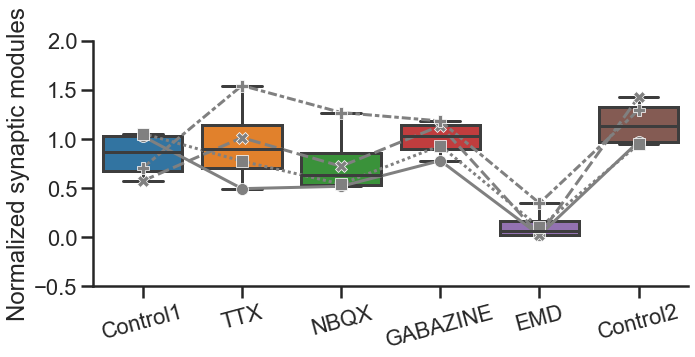

In [5]:
df = pd.read_csv('TTX_rabies_ratio_rename.csv')#,index_col=0
df.head()
# sns.set(font_scale=2)
sns.set_style("white",{'ytick.left':True,'xtick.bottom': True})
sns.set_context("poster") #paper, notebook, talk, and poster
g=sns.catplot(data=df,x='group',y='value',kind='box',height=5,aspect=2);
g=sns.lineplot(data=df, x='group',y='value',style = 'id',
               sort=False,legend=False,markers=True, dashes=True,
               color = 'grey',sizes=1)#hue='patient',
# g=sns.swarmplot(data=df,x='drug',y='response',linewidth=1,color='white',edgecolor='black',size=7)
g.set(ylim=[-0.5,2],xlabel='',ylabel='Normalized synaptic modules')
# plt.yscale("log")
plt.xticks(rotation=15)
plt.savefig("ttx_nbqx_gabazine_emd_dpi110.png",dpi=110,bbox_inches='tight',transparent=True)

In [6]:
from statsmodels.formula.api import ols

# res = ols("np.log(Days+1) ~ C(Weight) + C(Duration)", data).fit()
res = ols("value ~ group", df).fit()
pw = res.t_test_pairwise("group")
pw.result_frame
#ccorretion for control 1


,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Control2-Control1,0.320298,0.202681,1.580301,0.131450,-0.105520,0.746116,0.718711,False
EMD-Control1,-0.718319,0.202681,-3.544075,0.002318,-1.144137,-0.292500,0.027467,True
GABAZINE-Control1,0.166449,0.202681,0.821233,0.422257,-0.259369,0.592267,0.937207,False
NBQX-Control1,-0.078173,0.202681,-0.385692,0.704245,-0.503991,0.347645,0.937207,False
TTX-Control1,0.115902,0.202681,0.571845,0.574500,-0.309916,0.541720,0.937207,False
EMD-Control2,-1.038616,0.202681,-5.124376,0.000071,-1.464434,-0.612798,0.001064,True
GABAZINE-Control2,-0.153849,0.202681,-0.759067,0.457638,-0.579667,0.271969,0.937207,False
NBQX-Control2,-0.398470,0.202681,-1.965992,0.064917,-0.824288,0.027348,0.488906,False
TTX-Control2,-0.204395,0.202681,-1.008456,0.326601,-0.630213,0.221423,0.937207,False
GABAZINE-EMD,0.884767,0.202681,4.365309,0.000373,0.458949,1.310585,0.005210,True


In [12]:
from statsmodels.stats.multitest import multipletests
pvals = pw.result_frame['P>|t|'].values[:5]
print(pw.result_frame['P>|t|'].index[:5])
multipletests(pvals, alpha=0.05, method='sidak', is_sorted=False, returnsorted=False)#holm-sidak

Index(['Control2-Control1', 'EMD-Control1', 'GABAZINE-Control1',
       'NBQX-Control1', 'TTX-Control1'],
      dtype='object')


(array([False,  True, False, False, False]),
 array([0.50571893, 0.01153771, 0.93563176, 0.99773714, 0.98605243]),
 0.010206218313011495,
 0.01)